In [1]:
#necessary Libraries
import numpy as np
import pandas as pd
import time
import pprint

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
# magic word for producing visualizations in notebook
%matplotlib inline

#Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA 
from scipy.sparse import lil_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Models
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Scoring Metrics
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
file_path = r'C:\Users\Thesis2.0\django_thesis\Dataset\Data Gathering (Thesis 2)\ap_data_8r - Smaller Sample Size.csv'
ap_data = pd.read_csv(file_path)

In [3]:
# Check the structure of the data after it's loaded 
#(print the number of rows and columns).
num_rows, num_cols  = ap_data.shape
print('Number of columns: {}'.format(num_cols))
print('Number of rows: {}'.format(num_rows))

Number of columns: 8
Number of rows: 34249


In [4]:
#Check the columns names
col_names = ap_data.columns.values
col_names

array(['mac_address', 'ssid', 'channel', 'source', 'signal_strength',
       'floorid', 'timestamp', 'roomid'], dtype=object)

In [5]:
#check for missing values
missing_values_count = ap_data.isnull().sum()
#uncomment this if you want to see the count of missing data per column
#missing_values_count

# how many total missing values do we have?
total_cells = np.product(ap_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
missing_percent = (total_missing/total_cells) * 100

print('Percent of missing data = {}%'.format(missing_percent))

Percent of missing data = 0.0%


In [6]:
# Add a new column 'source_without_C' by removing 'C' from 'source'
ap_data['ssid'] = ap_data['ssid'].str.replace('C', '')

# Convert the 'source_without_C' column to numeric
ap_data['ssid'] = pd.to_numeric(ap_data['ssid'], errors='coerce')

In [7]:
#Assess unique values per columns
#unique_mac_address = ap_data["mac_address"].unique()
unique_ssid = ap_data["ssid"].unique()
unique_channel = ap_data["channel"].unique()
unique_floorid = ap_data["floorid"].unique()
unique_roomid = ap_data["roomid"].unique()

#print('Unique Mac Address : {}'.format(unique_mac_address))
print('Unique SSID : {}'.format(unique_ssid))
print('Unique Channel : {}'.format(unique_channel))

# Assuming unique_floorid is a NumPy array or a pandas Series
unique_floorid_sorted = np.sort(unique_floorid)

print('Unique Floor ID (Sorted):', unique_floorid_sorted)

print('Unique Room ID : {}'.format(unique_roomid))

unique_floorid_count = ap_data["floorid"].nunique()
print(f'Number of Unique Floor IDs: {unique_floorid_count}')

Unique SSID : [2 1]
Unique Channel : [2462 2452 2447 2457 2422 2417 2412 2427 2442 2437 2432]
Unique Floor ID (Sorted): [  1   4   7  10  13  16  19  22  25  28  31  34  37  40  43  46  49  52
  55  58  61  64  67  70  73  76  79 103 106 109 112 115 118 121 124 127
 130 133 136 139 142 145 148 151 154 157 160 163 166 169 172 175 178 181
 184 187 190 193 196 199 202 205 208 211 214 217 220 223 226 229 232 235
 238 241 244 247 250 253 256 259 262 265 268 271 274 277 280 283 286 289
 292 295 298 301 304 307 310 313 316 319 322 325 328 331 334 337 340 343
 346 349 352 355 358 361 364 367 370 373 376]
Unique Room ID : [214 213 111]
Number of Unique Floor IDs: 119


In [8]:
ap_data = ap_data.drop(['mac_address'], axis=1)

#Check the columns names
col_names = ap_data.columns.values
col_names

array(['ssid', 'channel', 'source', 'signal_strength', 'floorid',
       'timestamp', 'roomid'], dtype=object)

In [9]:
# Define the columns for duplication check
duplication_columns = ['ssid', 'channel', 'source', 'signal_strength', 'floorid']

# Count the number of occurrences for each combination of columns
ap_data['duplication_count'] = ap_data.groupby(duplication_columns)['ssid'].transform('count')

# Filter rows where duplication count is greater than or equal to 4
filtered_data = ap_data[ap_data['duplication_count'] >= 4]

# Save the result to a new CSV file or modify the original dataframe as needed
#filtered_data.to_csv('filtered_data.csv', index=False)

print(filtered_data)

# Group by duplication columns and aggregate values using, for example, the mean
merged_data = filtered_data.groupby(duplication_columns, as_index=False).mean()

# Drop the 'duplication_count' column if you don't need it in the final result
merged_data = merged_data.drop(columns=['duplication_count'])

# Save the result to a new CSV file or modify the original dataframe as needed
#merged_data.to_csv('Data_Filtering.csv', index=False)

print(merged_data)

       ssid  channel source  signal_strength  floorid         timestamp  \
2         1     2452   cap2              -65        1  13/12/2023 16:21   
4         1     2462   cap1              -78        1  13/12/2023 16:21   
5         2     2462   cap2              -61        1  13/12/2023 16:21   
6         1     2462   cap2              -58        1  13/12/2023 16:21   
8         1     2462   cap1              -78        1  13/12/2023 16:21   
...     ...      ...    ...              ...      ...               ...   
34243     2     2427   cap3              -66      376  13/12/2023 16:21   
34245     1     2432   cap2              -83      376  13/12/2023 16:21   
34246     2     2417   cap1              -77      376  13/12/2023 16:21   
34247     1     2432   cap1              -91      376  13/12/2023 16:21   
34248     1     2432   cap2              -83      376  13/12/2023 16:21   

       roomid  duplication_count  
2         214                  6  
4         214                

In [10]:
#Assess unique values per columns
#unique_mac_address = ap_data["mac_address"].unique()
unique_ssid = merged_data["ssid"].unique()
unique_channel = merged_data["channel"].unique()
unique_floorid = merged_data["floorid"].unique()
unique_roomid = merged_data["roomid"].unique()

#print('Unique Mac Address : {}'.format(unique_mac_address))
print('Unique SSID : {}'.format(unique_ssid))
print('Unique Channel : {}'.format(unique_channel))
print('Unique Floor ID : {}'.format(unique_floorid))
print('Unique Room ID : {}'.format(unique_roomid))

unique_floorid_count = merged_data["floorid"].nunique()
print(f'Number of Unique Floor IDs: {unique_floorid_count}')


Unique SSID : [1 2]
Unique Channel : [2412 2417 2422 2427 2432 2437 2442 2447 2452 2457 2462]
Unique Floor ID : [190 217 235 349 331 295 307 328 292 343 334 232 214 226 229 304 220 367
 301 223 313 325 322 298 310 316 346 340 319 337 358 118 148 352 370 277
 136 145 373 160 163 121 166 175 187 124 127 154 196 355 376 364 361 133
 112 181 169 151 142 106 157 103 172 130 178 193 109 184 115 139 205 265
 274 268 283 199 202 262 289 250 253 256 286  61 259 280 271 211  67  55
  73  76   1  10   4  70 208   7  43  16  58  34  19  37  64  46  52  28
  13  22  31 238 244 247 241  25  40  49  79]
Unique Room ID : [111 213 214]
Number of Unique Floor IDs: 119


In [11]:
# Count unique channels for each ssid, floorid, and source
merge_data = merged_data.groupby(['ssid', 'floorid', 'source', 'roomid'])['channel'].nunique().reset_index()

print(merge_data)

     ssid  floorid source  roomid  channel
0       1        1   cap1     214        2
1       1        1   cap2     214        3
2       1        4   cap1     214        1
3       1        4   cap2     214        3
4       1        7   cap1     214        2
..    ...      ...    ...     ...      ...
499     2      373   cap1     111        2
500     2      373   cap2     111        2
501     2      373   cap3     111        4
502     2      376   cap1     111        2
503     2      376   cap3     111        3

[504 rows x 5 columns]


In [12]:
# Define a custom aggregation function to calculate the product
def calculate_product(x):
    return x.prod()

# Group by 'ssid' and 'floorid', then aggregate using the custom function
result = merge_data.groupby(['ssid', 'floorid']).agg({
    'channel': calculate_product
}).reset_index()

# Display the result
print(result)

# Continue from the previous code
total_sum_combination = result['channel'].sum()

# Display the total sum
print("Total Sum of 'channel' values:", total_sum_combination)


     ssid  floorid  channel
0       1        1        6
1       1        4        3
2       1        7        2
3       1       10        3
4       1       13        2
..    ...      ...      ...
233     2      364        9
234     2      367        8
235     2      370       16
236     2      373       16
237     2      376        6

[238 rows x 3 columns]
Total Sum of 'channel' values: 1372


In [13]:
# Count the number of unique sources per 'ssid' and 'floorid'
result_counts = merge_data.groupby(['ssid', 'floorid'])['source'].nunique().reset_index()

# Rename the column to indicate the count of sources
result_counts = result_counts.rename(columns={'source': 'source_count'})

# Display the result
print(result_counts)

# Save the result to a new CSV file or modify the original dataframe as needed
#result_counts.to_csv('source_count.csv', index=False)

     ssid  floorid  source_count
0       1        1             2
1       1        4             2
2       1        7             2
3       1       10             2
4       1       13             2
..    ...      ...           ...
233     2      364             3
234     2      367             2
235     2      370             3
236     2      373             3
237     2      376             2

[238 rows x 3 columns]


In [14]:
# Calculate total RSSI for each unique channel within each ssid, floorid, and source
total_number_rssi = merged_data.groupby(['ssid', 'floorid', 'source', 'channel'])['signal_strength'].nunique().reset_index()

#total_number_rssi.to_csv('total_number_rssi.csv', index=False)

print(total_number_rssi)

      ssid  floorid source  channel  signal_strength
0        1        1   cap1     2457                2
1        1        1   cap1     2462                6
2        1        1   cap2     2452                3
3        1        1   cap2     2457                2
4        1        1   cap2     2462                3
...    ...      ...    ...      ...              ...
1132     2      376   cap1     2412                1
1133     2      376   cap1     2417                2
1134     2      376   cap3     2412                2
1135     2      376   cap3     2417                2
1136     2      376   cap3     2427                8

[1137 rows x 5 columns]


In [15]:
print(merged_data)

      ssid  channel source  signal_strength  floorid  roomid
0        1     2412   cap1              -92      190     111
1        1     2412   cap1              -92      217     111
2        1     2412   cap1              -90      235     111
3        1     2412   cap1              -89      217     111
4        1     2412   cap1              -89      235     111
...    ...      ...    ...              ...      ...     ...
2764     2     2462   cap3              -71      202     111
2765     2     2462   cap3              -71      211     111
2766     2     2462   cap3              -65      205     111
2767     2     2462   cap3              -64      205     111
2768     2     2462   cap3              -62      205     111

[2769 rows x 6 columns]


In [16]:
import pandas as pd
from itertools import product

start_time = time.time()


# Step 1: Identify missing sources and add rows with 0 channel and 100 signal_strength


# List of sources to check for each ssid and floorid combination
sources_to_check = ['cap1', 'cap2', 'cap3']

# Create a MultiIndex from ssid and floorid
index_cols = ['ssid', 'floorid']
multi_index = pd.MultiIndex.from_frame(merged_data[index_cols])

# Iterate over unique ssid and floorid combinations
for ssid, floorid in multi_index.unique():
    # Filter data for the current ssid and floorid
    subset = merged_data[(merged_data['ssid'] == ssid) & (merged_data['floorid'] == floorid)]
    
    # Get the sources present in the subset
    present_sources = subset['source'].unique()
    
    # Find the missing sources
    missing_sources = set(sources_to_check) - set(present_sources)
    
    # Add rows for missing sources
    for missing_source in missing_sources:
        merged_data = merged_data.append({
            'ssid': ssid,
            'channel': 0,
            'source': missing_source,
            'signal_strength': 100,
            'floorid': floorid,
            'roomid': subset['roomid'].iloc[0]  # Assuming roomid is the same for all rows in the subset
        }, ignore_index=True)

# Sort the DataFrame by ssid and floorid
merged_data = merged_data.sort_values(by=['ssid', 'floorid']).reset_index(drop=True)

# Remove rows where ssid is 0
merged_data = merged_data[merged_data['ssid'] != 0]

# Display the result
print(merged_data)

merged_data.to_csv('merged_data_with_0.csv', index=False)

print(merged_data)

# Step 2: Extract unique combinations of 'ssid', 'floorid', and 'roomid'
combinations = merged_data[['ssid', 'floorid', 'roomid']].drop_duplicates()

# Step 3: Calculate unique channels for each source
channel_counts = {}
for index, row in combinations.iterrows():
    ssid, floorid, roomid = row['ssid'], row['floorid'], row['roomid']
    channels = merged_data[(merged_data['ssid'] == ssid) & 
                           (merged_data['floorid'] == floorid) & 
                           (merged_data['roomid'] == roomid)].groupby('source')['channel'].unique()
    channel_counts[(ssid, floorid, roomid)] = channels

print(channel_counts)

# Step 4 and 5: Generate combinations and create DataFrame
combinations_list = []
for (ssid, floorid, roomid), channels in channel_counts.items():
    for source, channel_list in channels.items():
        for channel in channel_list:
            signal_strengths = merged_data[
                (merged_data['ssid'] == ssid) &
                (merged_data['floorid'] == floorid) &
                (merged_data['roomid'] == roomid) &
                (merged_data['source'] == source) &
                (merged_data['channel'] == channel)
            ]['signal_strength'].tolist()

            total_signal_strengths = len(signal_strengths)

            print(f'SSID: {ssid}, FloorID: {floorid}, RoomID: {roomid}, Total Number of Signal Strength for {source} channel {channel}: {total_signal_strengths}')

            combination = [ssid, floorid, roomid, source, f'channel_{channel}_signal_strength_{source}', signal_strengths]
            combinations_list.append(combination)

            
print(combinations_list)

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

      ssid  channel source  signal_strength  floorid  roomid
0        1     2452   cap2              -65        1     214
1        1     2452   cap2              -64        1     214
2        1     2452   cap2              -63        1     214
3        1     2457   cap1              -80        1     214
4        1     2457   cap1              -74        1     214
...    ...      ...    ...              ...      ...     ...
2974     2     2427   cap3              -62      376     111
2975     2     2427   cap3              -61      376     111
2976     2     2427   cap3              -60      376     111
2977     2     2427   cap3              -58      376     111
2978     2        0   cap2              100      376     111

[2979 rows x 6 columns]
      ssid  channel source  signal_strength  floorid  roomid
0        1     2452   cap2              -65        1     214
1        1     2452   cap2              -64        1     214
2        1     2452   cap2              -63        1     214

SSID: 1, FloorID: 46, RoomID: 214, Total Number of Signal Strength for cap1 channel 2462: 2
SSID: 1, FloorID: 46, RoomID: 214, Total Number of Signal Strength for cap2 channel 2457: 4
SSID: 1, FloorID: 46, RoomID: 214, Total Number of Signal Strength for cap2 channel 2462: 4
SSID: 1, FloorID: 46, RoomID: 214, Total Number of Signal Strength for cap3 channel 0: 1
SSID: 1, FloorID: 49, RoomID: 214, Total Number of Signal Strength for cap1 channel 2462: 4
SSID: 1, FloorID: 49, RoomID: 214, Total Number of Signal Strength for cap2 channel 2462: 3
SSID: 1, FloorID: 49, RoomID: 214, Total Number of Signal Strength for cap3 channel 0: 1
SSID: 1, FloorID: 52, RoomID: 214, Total Number of Signal Strength for cap1 channel 2462: 2
SSID: 1, FloorID: 52, RoomID: 214, Total Number of Signal Strength for cap2 channel 2457: 2
SSID: 1, FloorID: 52, RoomID: 214, Total Number of Signal Strength for cap2 channel 2462: 4
SSID: 1, FloorID: 52, RoomID: 214, Total Number of Signal Strength for cap3 channel 0:

SSID: 1, FloorID: 127, RoomID: 213, Total Number of Signal Strength for cap2 channel 2442: 1
SSID: 1, FloorID: 127, RoomID: 213, Total Number of Signal Strength for cap3 channel 2437: 2
SSID: 1, FloorID: 130, RoomID: 213, Total Number of Signal Strength for cap1 channel 2442: 1
SSID: 1, FloorID: 130, RoomID: 213, Total Number of Signal Strength for cap1 channel 2452: 2
SSID: 1, FloorID: 130, RoomID: 213, Total Number of Signal Strength for cap2 channel 2437: 2
SSID: 1, FloorID: 130, RoomID: 213, Total Number of Signal Strength for cap2 channel 2452: 1
SSID: 1, FloorID: 130, RoomID: 213, Total Number of Signal Strength for cap3 channel 2432: 2
SSID: 1, FloorID: 130, RoomID: 213, Total Number of Signal Strength for cap3 channel 2437: 2
SSID: 1, FloorID: 130, RoomID: 213, Total Number of Signal Strength for cap3 channel 2442: 1
SSID: 1, FloorID: 133, RoomID: 213, Total Number of Signal Strength for cap1 channel 2432: 1
SSID: 1, FloorID: 133, RoomID: 213, Total Number of Signal Strength fo

SSID: 1, FloorID: 163, RoomID: 213, Total Number of Signal Strength for cap3 channel 2442: 2
SSID: 1, FloorID: 166, RoomID: 213, Total Number of Signal Strength for cap1 channel 2442: 4
SSID: 1, FloorID: 166, RoomID: 213, Total Number of Signal Strength for cap2 channel 2427: 1
SSID: 1, FloorID: 166, RoomID: 213, Total Number of Signal Strength for cap2 channel 2432: 2
SSID: 1, FloorID: 166, RoomID: 213, Total Number of Signal Strength for cap2 channel 2437: 2
SSID: 1, FloorID: 166, RoomID: 213, Total Number of Signal Strength for cap2 channel 2442: 1
SSID: 1, FloorID: 166, RoomID: 213, Total Number of Signal Strength for cap3 channel 2432: 1
SSID: 1, FloorID: 166, RoomID: 213, Total Number of Signal Strength for cap3 channel 2437: 3
SSID: 1, FloorID: 166, RoomID: 213, Total Number of Signal Strength for cap3 channel 2442: 2
SSID: 1, FloorID: 169, RoomID: 213, Total Number of Signal Strength for cap1 channel 2432: 1
SSID: 1, FloorID: 169, RoomID: 213, Total Number of Signal Strength fo

SSID: 1, FloorID: 205, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 1, FloorID: 205, RoomID: 111, Total Number of Signal Strength for cap3 channel 2437: 1
SSID: 1, FloorID: 205, RoomID: 111, Total Number of Signal Strength for cap3 channel 2452: 1
SSID: 1, FloorID: 205, RoomID: 111, Total Number of Signal Strength for cap3 channel 2457: 3
SSID: 1, FloorID: 205, RoomID: 111, Total Number of Signal Strength for cap3 channel 2462: 5
SSID: 1, FloorID: 208, RoomID: 111, Total Number of Signal Strength for cap1 channel 0: 1
SSID: 1, FloorID: 208, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 1, FloorID: 208, RoomID: 111, Total Number of Signal Strength for cap3 channel 2452: 2
SSID: 1, FloorID: 208, RoomID: 111, Total Number of Signal Strength for cap3 channel 2457: 3
SSID: 1, FloorID: 208, RoomID: 111, Total Number of Signal Strength for cap3 channel 2462: 5
SSID: 1, FloorID: 211, RoomID: 111, Total Number of Signal Strength for cap1 ch

SSID: 1, FloorID: 259, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 1, FloorID: 259, RoomID: 111, Total Number of Signal Strength for cap3 channel 2447: 2
SSID: 1, FloorID: 259, RoomID: 111, Total Number of Signal Strength for cap3 channel 2452: 4
SSID: 1, FloorID: 259, RoomID: 111, Total Number of Signal Strength for cap3 channel 2457: 2
SSID: 1, FloorID: 262, RoomID: 111, Total Number of Signal Strength for cap1 channel 0: 1
SSID: 1, FloorID: 262, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 1, FloorID: 262, RoomID: 111, Total Number of Signal Strength for cap3 channel 2442: 3
SSID: 1, FloorID: 262, RoomID: 111, Total Number of Signal Strength for cap3 channel 2447: 1
SSID: 1, FloorID: 262, RoomID: 111, Total Number of Signal Strength for cap3 channel 2452: 2
SSID: 1, FloorID: 262, RoomID: 111, Total Number of Signal Strength for cap3 channel 2457: 4
SSID: 1, FloorID: 265, RoomID: 111, Total Number of Signal Strength for cap1 ch

SSID: 1, FloorID: 322, RoomID: 111, Total Number of Signal Strength for cap1 channel 2417: 4
SSID: 1, FloorID: 322, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 1, FloorID: 322, RoomID: 111, Total Number of Signal Strength for cap3 channel 2412: 1
SSID: 1, FloorID: 322, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 2
SSID: 1, FloorID: 322, RoomID: 111, Total Number of Signal Strength for cap3 channel 2422: 5
SSID: 1, FloorID: 322, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 1
SSID: 1, FloorID: 325, RoomID: 111, Total Number of Signal Strength for cap1 channel 2417: 1
SSID: 1, FloorID: 325, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 1, FloorID: 325, RoomID: 111, Total Number of Signal Strength for cap3 channel 2412: 3
SSID: 1, FloorID: 325, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 4
SSID: 1, FloorID: 325, RoomID: 111, Total Number of Signal Strength for cap3

SSID: 1, FloorID: 373, RoomID: 111, Total Number of Signal Strength for cap3 channel 2447: 4
SSID: 1, FloorID: 376, RoomID: 111, Total Number of Signal Strength for cap1 channel 2432: 9
SSID: 1, FloorID: 376, RoomID: 111, Total Number of Signal Strength for cap1 channel 2437: 1
SSID: 1, FloorID: 376, RoomID: 111, Total Number of Signal Strength for cap2 channel 2432: 4
SSID: 1, FloorID: 376, RoomID: 111, Total Number of Signal Strength for cap3 channel 2437: 1
SSID: 1, FloorID: 376, RoomID: 111, Total Number of Signal Strength for cap3 channel 2447: 4
SSID: 2, FloorID: 1, RoomID: 214, Total Number of Signal Strength for cap1 channel 2452: 1
SSID: 2, FloorID: 1, RoomID: 214, Total Number of Signal Strength for cap1 channel 2457: 2
SSID: 2, FloorID: 1, RoomID: 214, Total Number of Signal Strength for cap1 channel 2462: 5
SSID: 2, FloorID: 1, RoomID: 214, Total Number of Signal Strength for cap2 channel 2447: 1
SSID: 2, FloorID: 1, RoomID: 214, Total Number of Signal Strength for cap2 cha

SSID: 2, FloorID: 58, RoomID: 214, Total Number of Signal Strength for cap2 channel 2422: 1
SSID: 2, FloorID: 58, RoomID: 214, Total Number of Signal Strength for cap3 channel 0: 1
SSID: 2, FloorID: 61, RoomID: 214, Total Number of Signal Strength for cap1 channel 2457: 1
SSID: 2, FloorID: 61, RoomID: 214, Total Number of Signal Strength for cap1 channel 2462: 6
SSID: 2, FloorID: 61, RoomID: 214, Total Number of Signal Strength for cap2 channel 2462: 3
SSID: 2, FloorID: 61, RoomID: 214, Total Number of Signal Strength for cap3 channel 0: 1
SSID: 2, FloorID: 64, RoomID: 214, Total Number of Signal Strength for cap1 channel 2412: 1
SSID: 2, FloorID: 64, RoomID: 214, Total Number of Signal Strength for cap1 channel 2417: 2
SSID: 2, FloorID: 64, RoomID: 214, Total Number of Signal Strength for cap2 channel 2412: 3
SSID: 2, FloorID: 64, RoomID: 214, Total Number of Signal Strength for cap2 channel 2417: 5
SSID: 2, FloorID: 64, RoomID: 214, Total Number of Signal Strength for cap2 channel 24

SSID: 2, FloorID: 133, RoomID: 213, Total Number of Signal Strength for cap3 channel 2462: 1
SSID: 2, FloorID: 136, RoomID: 213, Total Number of Signal Strength for cap1 channel 2457: 1
SSID: 2, FloorID: 136, RoomID: 213, Total Number of Signal Strength for cap1 channel 2462: 5
SSID: 2, FloorID: 136, RoomID: 213, Total Number of Signal Strength for cap2 channel 2457: 4
SSID: 2, FloorID: 136, RoomID: 213, Total Number of Signal Strength for cap2 channel 2462: 5
SSID: 2, FloorID: 136, RoomID: 213, Total Number of Signal Strength for cap3 channel 2462: 6
SSID: 2, FloorID: 139, RoomID: 213, Total Number of Signal Strength for cap1 channel 2462: 4
SSID: 2, FloorID: 139, RoomID: 213, Total Number of Signal Strength for cap2 channel 2457: 3
SSID: 2, FloorID: 139, RoomID: 213, Total Number of Signal Strength for cap2 channel 2462: 4
SSID: 2, FloorID: 139, RoomID: 213, Total Number of Signal Strength for cap3 channel 2462: 6
SSID: 2, FloorID: 142, RoomID: 213, Total Number of Signal Strength fo

SSID: 2, FloorID: 190, RoomID: 111, Total Number of Signal Strength for cap3 channel 2452: 1
SSID: 2, FloorID: 190, RoomID: 111, Total Number of Signal Strength for cap3 channel 2457: 4
SSID: 2, FloorID: 190, RoomID: 111, Total Number of Signal Strength for cap3 channel 2462: 2
SSID: 2, FloorID: 193, RoomID: 111, Total Number of Signal Strength for cap1 channel 0: 1
SSID: 2, FloorID: 193, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 2, FloorID: 193, RoomID: 111, Total Number of Signal Strength for cap3 channel 2447: 2
SSID: 2, FloorID: 193, RoomID: 111, Total Number of Signal Strength for cap3 channel 2452: 2
SSID: 2, FloorID: 193, RoomID: 111, Total Number of Signal Strength for cap3 channel 2457: 7
SSID: 2, FloorID: 193, RoomID: 111, Total Number of Signal Strength for cap3 channel 2462: 4
SSID: 2, FloorID: 196, RoomID: 111, Total Number of Signal Strength for cap1 channel 0: 1
SSID: 2, FloorID: 196, RoomID: 111, Total Number of Signal Strength for cap2 ch

SSID: 2, FloorID: 256, RoomID: 111, Total Number of Signal Strength for cap1 channel 2412: 2
SSID: 2, FloorID: 256, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 2, FloorID: 256, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 4
SSID: 2, FloorID: 256, RoomID: 111, Total Number of Signal Strength for cap3 channel 2422: 4
SSID: 2, FloorID: 256, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 1
SSID: 2, FloorID: 259, RoomID: 111, Total Number of Signal Strength for cap1 channel 0: 1
SSID: 2, FloorID: 259, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 2, FloorID: 259, RoomID: 111, Total Number of Signal Strength for cap3 channel 2412: 2
SSID: 2, FloorID: 259, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 5
SSID: 2, FloorID: 259, RoomID: 111, Total Number of Signal Strength for cap3 channel 2422: 2
SSID: 2, FloorID: 259, RoomID: 111, Total Number of Signal Strength for cap3 ch

SSID: 2, FloorID: 325, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 3
SSID: 2, FloorID: 325, RoomID: 111, Total Number of Signal Strength for cap3 channel 2422: 3
SSID: 2, FloorID: 325, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 3
SSID: 2, FloorID: 328, RoomID: 111, Total Number of Signal Strength for cap1 channel 2417: 4
SSID: 2, FloorID: 328, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 2, FloorID: 328, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 3
SSID: 2, FloorID: 328, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 4
SSID: 2, FloorID: 331, RoomID: 111, Total Number of Signal Strength for cap1 channel 2417: 1
SSID: 2, FloorID: 331, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 2, FloorID: 331, RoomID: 111, Total Number of Signal Strength for cap3 channel 2412: 3
SSID: 2, FloorID: 331, RoomID: 111, Total Number of Signal Strength for cap3

SSID: 2, FloorID: 373, RoomID: 111, Total Number of Signal Strength for cap2 channel 2412: 2
SSID: 2, FloorID: 373, RoomID: 111, Total Number of Signal Strength for cap2 channel 2417: 1
SSID: 2, FloorID: 373, RoomID: 111, Total Number of Signal Strength for cap3 channel 2412: 2
SSID: 2, FloorID: 373, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 1
SSID: 2, FloorID: 373, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 1
SSID: 2, FloorID: 373, RoomID: 111, Total Number of Signal Strength for cap3 channel 2437: 6
SSID: 2, FloorID: 376, RoomID: 111, Total Number of Signal Strength for cap1 channel 2412: 1
SSID: 2, FloorID: 376, RoomID: 111, Total Number of Signal Strength for cap1 channel 2417: 2
SSID: 2, FloorID: 376, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 2, FloorID: 376, RoomID: 111, Total Number of Signal Strength for cap3 channel 2412: 2
SSID: 2, FloorID: 376, RoomID: 111, Total Number of Signal Strength for c

In [17]:
# Assuming the 'roomid' column is present in the 'merged_data' DataFrame

# Step 6: Combine the RSSI from each row
combined_rssi = pd.DataFrame(columns=['ssid', 'floorid', 'roomid', 'channel_cap1', 'channel_cap2', 'channel_cap3', 'signal_strength_cap1', 'signal_strength_cap2', 'signal_strength_cap3'])

for (ssid, floorid, roomid), channels in channel_counts.items():
    product_list = product(*(channels[source] for source in channels.keys()))

    for combination in product_list:
        row = {'ssid': ssid, 'floorid': floorid, 'roomid': merged_data[(merged_data['ssid'] == ssid) & (merged_data['floorid'] == floorid)]['roomid'].values[0]}
        for i, (source, channel) in enumerate(zip(channels.keys(), combination), start=1):
            row[f'channel_{source}'] = channel
            signal_strengths = merged_data[
                (merged_data['ssid'] == ssid) &
                (merged_data['floorid'] == floorid) &
                (merged_data['source'] == source) &
                (merged_data['channel'] == channel)
            ]['signal_strength'].tolist()

            row[f'signal_strength_cap{i}'] = signal_strengths if signal_strengths else None

        combined_rssi = combined_rssi.append(row, ignore_index=True)

print(combined_rssi)
combined_rssi.to_csv('combined_rssi_knn.csv', index=False)

     ssid floorid roomid channel_cap1 channel_cap2 channel_cap3  \
0       1       1    214         2457         2452            0   
1       1       1    214         2457         2457            0   
2       1       1    214         2457         2462            0   
3       1       1    214         2462         2452            0   
4       1       1    214         2462         2457            0   
...   ...     ...    ...          ...          ...          ...   
1367    2     376    111         2412            0         2417   
1368    2     376    111         2412            0         2427   
1369    2     376    111         2417            0         2412   
1370    2     376    111         2417            0         2417   
1371    2     376    111         2417            0         2427   

                signal_strength_cap1 signal_strength_cap2  \
0                         [-80, -74]      [-65, -64, -63]   
1                         [-80, -74]           [-63, -58]   
2           

In [18]:
# Step 7: Combine the RSSI from each row
combined_rssi_final = pd.DataFrame(columns=combined_rssi.columns)  # Initialize an empty DataFrame

for index, row in combined_rssi.head(total_sum_combination).iterrows():  # Iterate only over the first 9 rows
    ssid, floorid, roomid, channel_cap1, channel_cap2, channel_cap3 = row['ssid'], row['floorid'], row['roomid'], row['channel_cap1'], row['channel_cap2'], row['channel_cap3']
    
    # Create all possible combinations of signal strengths
    signal_strengths = [row['signal_strength_cap1'], row['signal_strength_cap2'], row['signal_strength_cap3']]
    
    # Handle the case where signal strength is an integer (100)
    signal_combinations = [signal if isinstance(signal, list) else [signal] for signal in signal_strengths]
    
    for signal_combination in product(*signal_combinations):
        combined_rssi_final = combined_rssi_final.append({
            'ssid': ssid,
            'floorid': floorid,
            'roomid': roomid,
            'channel_cap1': channel_cap1,
            'channel_cap2': channel_cap2,
            'channel_cap3': channel_cap3,
            'signal_strength_cap1': signal_combination[0],
            'signal_strength_cap2': signal_combination[1],
            'signal_strength_cap3': signal_combination[2]
        }, ignore_index=True)

# Display the result
print(combined_rssi_final)

#combined_rssi_final.to_csv('Data_Processed.csv', index=False)


      ssid floorid roomid channel_cap1 channel_cap2 channel_cap3  \
0        1       1    214         2457         2452            0   
1        1       1    214         2457         2452            0   
2        1       1    214         2457         2452            0   
3        1       1    214         2457         2452            0   
4        1       1    214         2457         2452            0   
...    ...     ...    ...          ...          ...          ...   
11002    2     376    111         2417            0         2427   
11003    2     376    111         2417            0         2427   
11004    2     376    111         2417            0         2427   
11005    2     376    111         2417            0         2427   
11006    2     376    111         2417            0         2427   

      signal_strength_cap1 signal_strength_cap2 signal_strength_cap3  
0                      -80                  -65                  100  
1                      -80               

In [19]:
# Check the structure of the data after it's loaded 
#(print the number of rows and columns).
num_rows, num_cols  = combined_rssi_final.shape
print('Number of columns: {}'.format(num_cols))
print('Number of rows: {}'.format(num_rows))

Number of columns: 9
Number of rows: 11007


In [20]:
#Preprocess the Training Data Set //////////////////////////////////////////////////////////////////////////////////////////////

In [39]:
# Load the dataset
trainingData = combined_rssi_final

print(trainingData)

      ssid floorid roomid channel_cap1 channel_cap2 channel_cap3  \
0        1       1    214         2457         2452            0   
1        1       1    214         2457         2452            0   
2        1       1    214         2457         2452            0   
3        1       1    214         2457         2452            0   
4        1       1    214         2457         2452            0   
...    ...     ...    ...          ...          ...          ...   
11002    2     376    111         2417            0         2427   
11003    2     376    111         2417            0         2427   
11004    2     376    111         2417            0         2427   
11005    2     376    111         2417            0         2427   
11006    2     376    111         2417            0         2427   

      signal_strength_cap1 signal_strength_cap2 signal_strength_cap3  
0                      -80                  -65                  100  
1                      -80               

In [40]:
# Check for missing values
missing_values_count = trainingData.isnull().sum()

# Find rows with missing values
rows_with_missing_values = trainingData[trainingData.isnull().any(axis=1)]

# Print row numbers with missing values
print("Row numbers with missing values:")
print(rows_with_missing_values.index.tolist())

# Uncomment this if you want to see the count of missing data per column
# missing_values_count

# How many total missing values do we have?
total_cells = np.product(trainingData.shape)
total_missing = missing_values_count.sum()

# Percent of data that is missing
missing_percent = (total_missing / total_cells) * 100

print('Percent of missing data = {:.2f}%'.format(missing_percent))

Row numbers with missing values:
[]
Percent of missing data = 0.00%


In [41]:
def clean_data(df):
    """
    Perform feature trimming, and engineering for trainingData
    Will also be applied to validationData
    
    INPUT: trainingData DataFrame
    OUTPUT: Trimmed and cleaned trainingData DataFrame
    """
    
    # Reverse the representation for the values. 100=0 and teh values range from 0-105 (weakest to strongest)
    #"The intensity values are represented as negative integer values ranging -104dBm (extremely poor signal) to 0dbM.
    #The positive value 100 is used to denote when a WAP was not detected."
    
    '''
    df.iloc[:, 5:8] = np.where(df.iloc[:, 5:8] <= 0, 
                df.iloc[:, 5:8] + 105, 
                df.iloc[:, 5:8] - 100)
    '''
    
    '''
    df.iloc[:, 6:9] = np.where(df.iloc[:, 6:9] > 2000, 
                df.iloc[:, 6:9] - 2300, 
                df.iloc[:, 6:9] - 0)
    '''
    
    '''
    # Remove rows if there are two zeroes in a row in the cap_channel
    df = df[
    ~((df['channel_cap1'] == 0) & (df['channel_cap2'] == 0)) &
    ~((df['channel_cap1'] == 0) & (df['channel_cap3'] == 0)) &
    ~((df['channel_cap2'] == 0) & (df['channel_cap3'] == 0))
    ]

    
    # Remove rows if there are one zeroes in a row in the cap_channel
    df = df[
    ~((df['channel_cap1'] == 0)) &
    ~((df['channel_cap2'] == 0)) &
    ~((df['channel_cap3'] == 0)) 
    ]
    '''

    # Return the cleaned dataframe.
    return df 

In [49]:
#Apply Cleaning

trainingData  = clean_data(trainingData)
cleaned_data = trainingData

#trainingData.to_csv('trainingData-ap_data_ap_data_8.csv', index=False)

print(trainingData)

      ssid floorid roomid channel_cap1 channel_cap2 channel_cap3  \
0        1       1    214         2457         2452            0   
1        1       1    214         2457         2452            0   
2        1       1    214         2457         2452            0   
3        1       1    214         2457         2452            0   
4        1       1    214         2457         2452            0   
...    ...     ...    ...          ...          ...          ...   
11002    2     376    111         2417            0         2427   
11003    2     376    111         2417            0         2427   
11004    2     376    111         2417            0         2427   
11005    2     376    111         2417            0         2427   
11006    2     376    111         2417            0         2427   

      signal_strength_cap1 signal_strength_cap2 signal_strength_cap3  
0                      -80                  -65                  100  
1                      -80               

In [50]:
#Assess unique values per columns
#unique_mac_address = ap_data["mac_address"].unique()
unique_ssid = trainingData["ssid"].unique()
unique_channel_cap1 = trainingData["channel_cap1"].unique()
unique_channel_cap2 = trainingData["channel_cap2"].unique()
unique_channel_cap3 = trainingData["channel_cap3"].unique()
unique_floorid = trainingData["floorid"].unique()
unique_roomid = trainingData["roomid"].unique()

#print('Unique Mac Address : {}'.format(unique_mac_address))
print('Unique SSID : {}'.format(unique_ssid))
print('Unique Channel cap1 : {}'.format(unique_channel_cap1))
print('Unique Channel cap2: {}'.format(unique_channel_cap2))
print('Unique Channel cap3: {}'.format(unique_channel_cap3))

# Assuming unique_floorid is a NumPy array or a pandas Series
unique_floorid_sorted = np.sort(unique_floorid)

print('Unique Floor ID (Sorted):', unique_floorid_sorted)

print('Unique Room ID : {}'.format(unique_roomid))

unique_channels_combined = np.union1d(np.union1d(unique_channel_cap1, unique_channel_cap2), unique_channel_cap3)

print('Unique Channel combined:', unique_channels_combined)

unique_floorid_count = trainingData["floorid"].nunique()
print(f'Number of Unique Floor IDs: {unique_floorid_count}')

Unique SSID : [1 2]
Unique Channel cap1 : [2457 2462 2452 2437 2442 2447 2432 2427 0 2412 2417 2422]
Unique Channel cap2: [2452 2457 2462 2447 2432 2437 2442 2422 2427 2412 0 2417]
Unique Channel cap3: [0 2462 2437 2442 2432 2427 2447 2412 2417 2422 2457 2452]
Unique Floor ID (Sorted): [1 4 7 10 13 16 19 22 25 28 31 34 37 40 43 46 49 52 55 58 61 64 67 70 73
 76 79 103 106 109 112 115 118 121 124 127 130 133 136 139 142 145 148 151
 154 157 160 163 166 169 172 175 178 181 184 187 190 193 196 199 202 205
 208 211 214 217 220 223 226 229 232 235 238 241 244 247 250 253 256 259
 262 265 268 271 274 277 280 283 286 289 292 295 298 301 304 307 310 313
 316 319 322 325 328 331 334 337 340 343 346 349 352 355 358 361 364 367
 370 373 376]
Unique Room ID : [214 213 111]
Unique Channel combined: [0 2412 2417 2422 2427 2432 2437 2442 2447 2452 2457 2462]
Number of Unique Floor IDs: 119


In [53]:
import pandas as pd

def preprocess_data(df):
    """
    Separates trainingData into Features and Targets
    Will also be applied to validationData
    
    INPUT: Cleaned trainingData DataFrame
    OUTPUT: trainingData as Features and Targets
    """
    # split the data set into features and targets(Floor and BuildingID)
    X = df.drop(['floorid', 'roomid'], axis=1)
    y = df[['floorid', 'roomid']]
    
    # Extract unique channel values
    unique_channels = sorted(set(df['channel_cap1'].unique()) | set(df['channel_cap2'].unique()) | set(df['channel_cap3'].unique()))
    
    # Create new one-hot encoded columns
    for channel in unique_channels:
        X[f'channel_cap1_{channel}'] = (df['channel_cap1'] == channel).astype(int)
        X[f'channel_cap2_{channel}'] = (df['channel_cap2'] == channel).astype(int)
        X[f'channel_cap3_{channel}'] = (df['channel_cap3'] == channel).astype(int)
    
    # Drop the original 'channel_cap1', 'channel_cap2', and 'channel_cap3' columns
    X.drop(['channel_cap1', 'channel_cap2', 'channel_cap3'], axis=1, inplace=True)
    
    # Iterate over signal strength caps and channels to perform multiplication
    signal_columns = ['signal_strength_cap1', 'signal_strength_cap2', 'signal_strength_cap3']
    
    for signal_col in signal_columns:
        for channel in unique_channels:
            channel_col1 = f'channel_cap1_{channel}'
            channel_col2 = f'channel_cap2_{channel}'
            channel_col3 = f'channel_cap3_{channel}'
            
            if signal_col.endswith('cap1'):
                X[f'{signal_col}_{channel_col1}'] = df[signal_col] * X[channel_col1]
            elif signal_col.endswith('cap2'):
                X[f'{signal_col}_{channel_col2}'] = df[signal_col] * X[channel_col2]
            elif signal_col.endswith('cap3'):
                X[f'{signal_col}_{channel_col3}'] = df[signal_col] * X[channel_col3]

    # Drop the original 'signal_strength' columns
    X.drop(['signal_strength_cap1', 'signal_strength_cap2', 'signal_strength_cap3'], axis=1, inplace=True)
    
    # Drop unwanted columns
    unwanted_columns = [f'channel_cap{i}_{cap}' for i in range(1, 4) for cap in unique_channels]
    X.drop(unwanted_columns, axis=1, inplace=True)
    
    # create Dummies for the targets to feed into the model
    y = pd.get_dummies(data=y, columns=['floorid', 'roomid'])
    
    return X, y

In [54]:
#Apply preprocessing

X, y = preprocess_data(trainingData)


#X.to_csv('X_train.csv', index=False)
#y.to_csv('y_train.csv', index=False)

In [55]:
def split_data(preprocess_data):
# TO AVOID OVERFITTING: Split the training data into training and testing sets 
    global X_train
    global X_test
    global y_train
    global y_test
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.20, 
                                                        random_state = 42,
                                                        shuffle=True)

    # Show the results of the split
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))
    return X_train, X_test, y_train, y_test

In [56]:
#Apply split data

X_train, X_test, y_train, y_test = split_data(preprocess_data)



Training set has 8805 samples.
Testing set has 2202 samples.


In [57]:
start_time = time.time()

#Scale Data with Standard Scaler

scaler = StandardScaler()

#Fit only the training set
#this will help us transform the validation data 
scaler.fit(X_train)
    
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


k = 1  # You can adjust the value of k
knn = KNeighborsClassifier(n_neighbors=k, p=1)  # p=2 for Euclidean metric
knn.fit(X_train, y_train)

# Assuming 'knn' is your trained KNN classifier
# Assuming 'X_test' and 'y_test' are your test features and labels
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

from sklearn.metrics import classification_report


# Replace this list with the actual classes present in your data
column_names = y_train.columns  

# Print classification report
report = classification_report(y_test, y_pred, target_names=column_names)
print(report)


print(y_pred)

#See the predictions and translate them
'''
#map the labels to their name
labels = y.columns.tolist() 
lables_dict = {key: i for i, key in enumerate(labels)}

#Turn predictions into readable list of lists
my_predictions = y_pred.rows.tolist()

#translate the values to their keys.
#Change the my_predictions[0] value to
#my_predictions[index_value] to translate insights
for i in range(len(y_test)):
    get_keys = [k for k, v in lables_dict.items() 
                if v in my_predictions[i]]

    print(f'{i+1}',get_keys)
'''
print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))


Accuracy: 79.20%
              precision    recall  f1-score   support

   floorid_1       0.62      0.69      0.66        29
   floorid_4       0.33      0.29      0.31         7
   floorid_7       0.38      0.33      0.36        15
  floorid_10       0.00      0.00      0.00         2
  floorid_13       0.24      0.50      0.32         8
  floorid_16       0.70      0.78      0.74         9
  floorid_19       0.33      1.00      0.50         1
  floorid_22       0.00      0.00      0.00         2
  floorid_25       0.30      0.30      0.30        10
  floorid_28       0.00      0.00      0.00         2
  floorid_31       0.00      0.00      0.00         2
  floorid_34       1.00      0.20      0.33         5
  floorid_37       0.00      0.00      0.00         9
  floorid_40       0.50      0.50      0.50         6
  floorid_43       0.25      0.33      0.29         9
  floorid_46       0.00      0.00      0.00         7
  floorid_49       0.40      0.36      0.38        11
  floorid_

C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
#Apply PCA while keeping 95% of the variation in the data
pca = PCA(.95)

    
#Fit only the training set    
pca.fit(X_train)

# Apply PCA transform to both the training set and the test set.    
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Number of PCA Components = {}.".format(pca.n_components_))
#print(pca.n_components_)
print("Total Variance Explained by PCA Components = {}.".format(pca.explained_variance_ratio_.sum()))
#print(pca.explained_variance_ratio_.sum())

Number of PCA Components = 28.
Total Variance Explained by PCA Components = 0.9604401000199976.


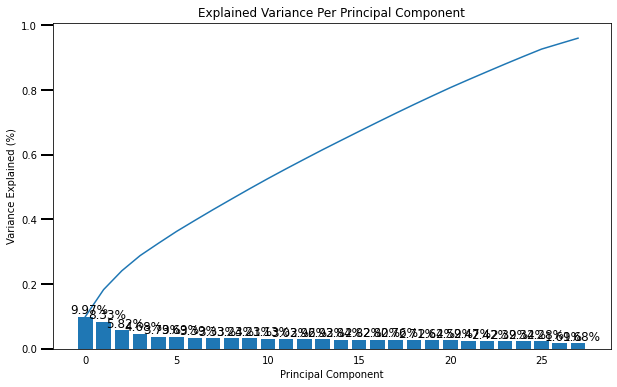

In [59]:
def pca_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    
pca_plot(pca)

In [60]:
#Create sparse matrices to run the scikit multilearn algorithms

X_train_pca = lil_matrix(X_train_pca).toarray()
y_train = lil_matrix(y_train).toarray()
X_test_pca = lil_matrix(X_test_pca).toarray()
y_test = lil_matrix(y_test).toarray()

In [61]:
# using binary relevance
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

BR_classifier = BinaryRelevance(GaussianNB())
# train
BR_classifier.fit(X_train, y_train)
# predict
predictions = BR_classifier.predict(X_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))


Accuracy =  0.011353315168029064
--- Run time: 0.06 mins ---


In [62]:
# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

CC_classifier = ClassifierChain(GaussianNB())

# train
CC_classifier.fit(X_train, y_train)

# predict
predictions = CC_classifier.predict(X_test)

accuracy_score(y_test,predictions)
print('Test accuracy is {}'.format(accuracy_score(y_test, predictions)))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Test accuracy is 0.13306085376930063
--- Run time: 0.14 mins ---


In [63]:
# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

LP_classifier = LabelPowerset(GaussianNB())

# train
LP_classifier.fit(X_train, y_train)

# predict
predictions = LP_classifier.predict(X_test)

accuracy_score(y_test,predictions)
print('Test accuracy is {}'.format(accuracy_score(y_test, predictions)))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Test accuracy is 0.15712988192552224
--- Run time: 0.01 mins ---


In [64]:
start_time = time.time()

MLKNN_classifier = MLkNN(k=1)

# train
MLKNN_classifier.fit(X_train_pca, y_train)

# predict mlknn = 1
predictions = MLKNN_classifier.predict(X_test_pca)

#print(predictions)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Accuracy =  0.7670299727520435
--- Run time: 1.26 mins ---


In [38]:
#This is takes a long time to run
#Find the optimal set of parameters

start_time = time.time()

parameters = {'k': range(1,10), 's': [0.5, 0.7, 1.0]}

score = 'accuracy'


clf = GridSearchCV(MLkNN(), parameters, scoring=score, cv=5)
clf.fit(X_train_pca, y_train)

print (clf.best_params_, clf.best_score_)
print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  

KeyboardInterrupt: 